# Importing packages

In [1]:
from toggle_equations import *
from attractor_stats import *
from steady_states import *
from sim_funcs import *
from plotting_funcs import *

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc

import pandas as pd
import seaborn as sns
sns.set(style='white', context='notebook', 
        palette='muted', rc={'axes.labelsize': 16})
from collections import OrderedDict,Counter
#import networkx as nx
#from networkx.drawing.nx_agraph import to_agraph

#from scipy.optimize import fsolve
#import matplotlib.collections as mcoll
# set the colormap and centre the colorbar
#import matplotlib.colors as colors
#from math import *
#from itertools import groupby
#import numbers
#import numba


# Parameters for Euler-Marayama simulation (non-autonomous)

In [2]:
# Parameters for EM simulation
alpha1 = 0.3
alpha2 = 0.3
a = 0.6 
c = 0.6
b = 0.4
d = 0.4
max1 = 1
max2 = 1
lambda1 = 1.25
lambda2 = 1.25
omega = 50

dt = .001  # Time step.
T = 150  # Total time.
n_traj = 10000
x_init = 0.6
y_init = 0.6
tolerance = 1e-8
n = int(T / dt)

# For EM with change in parameter regime.
diverging_time = n/3
step_change = 100
max_val = 0.8
min_val = 0.3

#Attractor switching parameters
dist_entry_x = dist_entry_y = 0.1
dist_exit_x = dist_exit_y = 0.4

#For plotting
t = np.linspace(0., T, n)  # Vector of times.
ss_colors = ['#38CAFF', '#ff9400', '#99dd44'] # Since we have a maximum of 3 attractors (stable ss)
ss_unstable_colors = ['#ed1c24', '#fe6dbc', '#fca085'] 

# Simulating trajectories

In [3]:
em_change_traj = np.load("files/npy/em_traj_change_3regimes.npy",allow_pickle=True)

In [4]:
em_change_traj_final = em_change_traj

# Description of in-silico experiment

<p>
<img src="images/non-autonomy_regime.png" width="500"/>    
</p>


# Regime 01 (Autonomous)

## Steady state and classifying stability

In [42]:
#Obtain steady state coordinates at final timepoint parameter values:
myPara = [[0.3,0.3]]
x_coordinate_ss, y_coordinate_ss = steady_states (alpha1, alpha2, a, c, b, d, lambda1, lambda2, myPara)
stable_steady_states, unstable_steady_states = stability (alpha1, alpha2, a, c, b, d, lambda1, lambda2, x_coordinate_ss, y_coordinate_ss)
grouped_stable_ss, grouped_unstable_ss = group_steady_states(stable_steady_states, unstable_steady_states, myPara)

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

## Labelling and counting final attractors at t = n/3

odict_values([26, 5942, 2000, 2032])

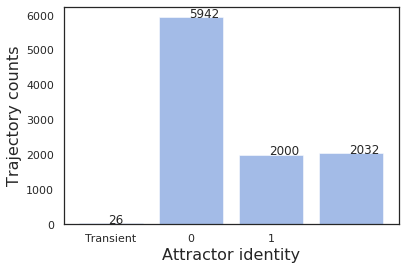

In [19]:
final_attractors = final_attractor(em_change_traj_final[:,:,0:int(n/3)], dist_exit_x, dist_exit_y, stable_steady_states)
attractor_count_dict = OrderedDict(sorted(Counter(final_attractors).items(), key=lambda t: t[0]))
fig, ax = plt.subplots()

ax.bar(attractor_count_dict.keys(), attractor_count_dict.values(), align='center', alpha=0.5)
plt.ylabel('Trajectory counts')
plt.xlabel('Attractor identity')
ax.xaxis.set_ticks(np.arange(-1, 2, 1))#ax.plot.xticks([-1,0,1,2])
a = ax.get_xticks().tolist()
a[0] = "Transient"
ax.set_xticklabels(a)

for index, count in enumerate(attractor_count_dict.values()):
    plt.text(x=index-1.03 , y =count+1 , s=f"{count}" , fontdict=dict(fontsize=12))

attractor_count_dict.values()

## Classifying trajectories as transient or in alternative attractor

In [20]:
last = em_change_traj_final[:,:,int(n/3)]
x_vals = last[:,0].flatten()
y_vals = last[:,1].flatten()
traj_hm = pd.DataFrame({"x" : x_vals, "y" : y_vals})

In [21]:
transient_index = [i for i, j in enumerate(final_attractors) if j == -1]
transient_traj = em_change_traj_final[transient_index]

transient_last = transient_traj[:,:,int(n/3)]
transient_x_vals = transient_last[:,0].flatten()
transient_y_vals = transient_last[:,1].flatten()
transient_traj_hm = pd.DataFrame({"x" : transient_x_vals, "y" : transient_y_vals})

alt_index = [i for i, j in enumerate(final_attractors) if j == 1]
alt_traj = em_change_traj_final[alt_index]

alt_last = alt_traj[:,:,int(n/3)]
alt_x_vals = alt_last[:,0].flatten()
alt_y_vals = alt_last[:,1].flatten()
alt_traj_hm = pd.DataFrame({"x" : alt_x_vals, "y" : alt_y_vals})


## First passage time 

In [22]:
em_diverging = em_change_traj[:,:,:int(diverging_time)]
dist_entry_x = dist_entry_y = dist_x = dist_y = 0.1
dist_exit_x = dist_exit_y = 0.4
fpt = first_passage_time(em_diverging, T, n, dist_entry_x, dist_entry_y, stable_steady_states)
np.save(file = "140121_em_traj_change_fpt", arr = fpt)
#fpt = np.load("files/npy/em_traj_change_fpt.npy")

KeyboardInterrupt: 

In [ ]:
fpt.shape

## Plot - Density plot with proportion inset 


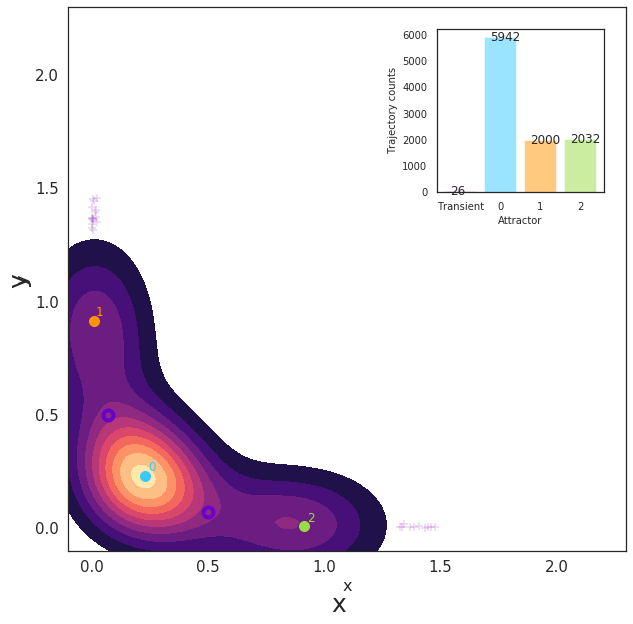

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
fig.text(0.5, 0.04, 'x', ha ='center', fontsize = 25)
fig.text(0.04, 0.5, 'y', va='center', rotation='vertical', fontsize = 25)

ax.set_xlim([-0.1,2.3])
ax.set_ylim([-0.1,2.3])
ax.set_xticks(np.arange(0, 2.5, 0.5))
ax.set_yticks(np.arange(0, 2.5, 0.5))
ax.tick_params(axis='both', which='major', labelsize=15)
x_ss_stable = grouped_stable_ss[0][:,0][:,2]
y_ss_stable = grouped_stable_ss[0][:,1][:,2]


for ss_index in range(len(x_ss_stable)):
    ax.plot(x_ss_stable[ss_index], y_ss_stable[ss_index], '.', color = ss_colors[ss_index], markersize= 20 )
    ax.annotate('{}'.format(ss_index), xy=(x_ss_stable[ss_index], y_ss_stable[ss_index]),  xycoords='data',
        xytext=(x_ss_stable[ss_index] + 0.01, y_ss_stable[ss_index] + 0.02), color = ss_colors[ss_index])

x_ss_unstable = grouped_unstable_ss[0][:,0][:,2]
y_ss_unstable = grouped_unstable_ss[0][:,1][:,2]
for ss_index in range(len(x_ss_unstable)):
    ax.plot(x_ss_unstable[ss_index], y_ss_unstable[ss_index], '.', color = "#6600cc", mfc='none',markeredgewidth = 4, markersize= 20 )
    
#ax2.set_title("Alpha = {},{}".format(grouped_stable_ss[:,0][0][0], grouped_stable_ss[:,0][0][1]))

ins = ax.inset_axes([0.66,0.66,0.3,0.3])
attractor_count_dict = OrderedDict(sorted(Counter(final_attractors).items(), key=lambda t: t[0]))
barplot_col = ['#992DBA', '#38CAFF', '#ff9400', '#99dd44']
ins.bar(attractor_count_dict.keys(), attractor_count_dict.values(), align='center', alpha=0.5, color = barplot_col)
ins.set_ylabel('Trajectory counts')
ins.set_xlabel('Attractor')
ins.set_xticks(np.arange(-1, len(x_ss_stable),1))#ax.plot.xticks([-1,0,1,2])
labels = ins.get_xticks().tolist()
labels[0] = "Transient"
ins.set_xticklabels(labels)

for item in ([ins.xaxis.label, ins.yaxis.label] +
             ins.get_xticklabels() + ins.get_yticklabels()):
    item.set_fontsize(10)
    
for index, count in enumerate(attractor_count_dict.values()):
    ins.text(x=index-1.25 , y =count-150 , s=f"{count}" , fontdict=dict(fontsize=12))

       
sns.kdeplot(traj_hm.x, traj_hm.y, cmap=plt.cm.magma, shade=True, bw=.15, gridsize=100, ax = ax, shade_lowest = False)
ax.scatter(transient_traj_hm.x, transient_traj_hm.y, color = '#992DBA', s = 60, marker = '+', alpha = 0.2)

#ax.scatter(alt_traj_hm.x, alt_traj_hm.y, color = '#E6A260', s = 60, marker = '+', alpha = 0.2)

#fig.savefig('images/03_test_density_switch_rebel_regime1.png', bbox_inches='tight')

#b = ax2.scatter(em_change_traj[path_id][0][time_start:time_max], em_change_traj[path_id][1][time_start:time_max], c = range(n), norm=MidpointNormalize(midpoint=diverging_time,vmin=time_start, vmax=time_max), cmap=plt.cm.PiYG, linewidths=0, marker='o', s=3)
#ax2.set_title("Phase portrait of X and Y with simulated trajectory")
#plt.colorbar(b)

#  Regime 02 (Non-autonomous)

## Steady state and classifying stability

In [5]:
#Obtain steady state coordinates at final timepoint parameter values:
myPara= [[0.8,0.3]]
x_coordinate_ss, y_coordinate_ss = steady_states (alpha1, alpha2, a, c, b, d, lambda1, lambda2, myPara)
stable_steady_states, unstable_steady_states = stability (alpha1, alpha2, a, c, b, d, lambda1, lambda2, x_coordinate_ss, y_coordinate_ss)
grouped_stable_ss, grouped_unstable_ss = group_steady_states(stable_steady_states, unstable_steady_states, myPara)

/home/porcupine/miniconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


## Labelling and counting final attractors at t = 2n/3

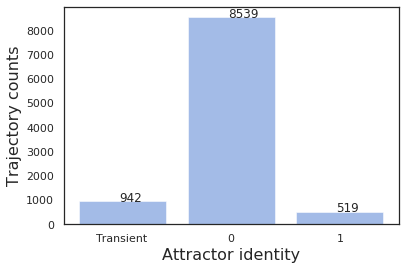

In [6]:
final_attractors = final_attractor(em_change_traj_final[:,:,0:int(2*n/3)], dist_exit_x, dist_exit_y, stable_steady_states)

attractor_count_dict = OrderedDict(sorted(Counter(final_attractors).items(), key=lambda t: t[0]))
fig, ax = plt.subplots()

ax.bar(attractor_count_dict.keys(), attractor_count_dict.values(), align='center', alpha=0.5)
plt.ylabel('Trajectory counts')
plt.xlabel('Attractor identity')
ax.xaxis.set_ticks(np.arange(-1, 2, 1))#ax.plot.xticks([-1,0,1,2])
a = ax.get_xticks().tolist()
a[0] = "Transient"
ax.set_xticklabels(a)

for index, count in enumerate(attractor_count_dict.values()):
    plt.text(x=index-1.03 , y =count+1 , s=f"{count}" , fontdict=dict(fontsize=12))

In [13]:
final_attractors

[0,
 -1,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 -1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 -1,
 -1,
 0,
 1,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 1,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 -1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0

## Classifying trajectories as transient or in alternative attractor

In [7]:
last = em_change_traj_final[:,:,int(2*n/3)]
x_vals = last[:,0].flatten()
y_vals = last[:,1].flatten()
traj_hm = pd.DataFrame({"x" : x_vals, "y" : y_vals})

In [15]:
alt_traj.shape

(519, 2, 150000)

In [27]:
transient_index = [i for i, j in enumerate(final_attractors) if j == -1]
transient_traj = em_change_traj[transient_index]

transient_last = transient_traj[:,:,int(2*n/3)]
transient_x_vals = transient_last[:,0].flatten()
transient_y_vals = transient_last[:,1].flatten()
transient_traj_hm = pd.DataFrame({"x" : transient_x_vals, "y" : transient_y_vals})

alt_index = [i for i, j in enumerate(final_attractors) if j == 1]
alt_traj = em_change_traj[alt_index]

alt_last = alt_traj[:,:,int(2*n/3)]

alt_x_vals = alt_last[:,0].flatten()
alt_y_vals = alt_last[:,1].flatten()
alt_traj_hm = pd.DataFrame({"x" : alt_x_vals, "y" : alt_y_vals})


In [24]:
alt_last

array([[0.03294129, 0.97597332],
       [0.03091615, 0.73547521],
       [0.02701921, 0.62722137],
       ...,
       [0.00456362, 1.17055349],
       [0.04533253, 0.87405844],
       [0.06557545, 0.80656122]])

## First passage time

In [63]:
em_diverging = em_change_traj[:,:,int(diverging_time):int(diverging_time*2)]
dist_entry_x = dist_entry_y = dist_x = dist_y = 0.1
dist_exit_x = dist_exit_y = 0.4
fpt_2 = first_passage_time(em_diverging, T, n, dist_entry_x, dist_entry_y, stable_steady_states)
#np.save(file = "em_traj_change_fpt", arr = fpt)
#fpt = np.load("files/npy/em_traj_change_fpt.npy")

In [66]:
fpt_2.shape

(10000, 3)

## Plot - Density plot wth proportion inset

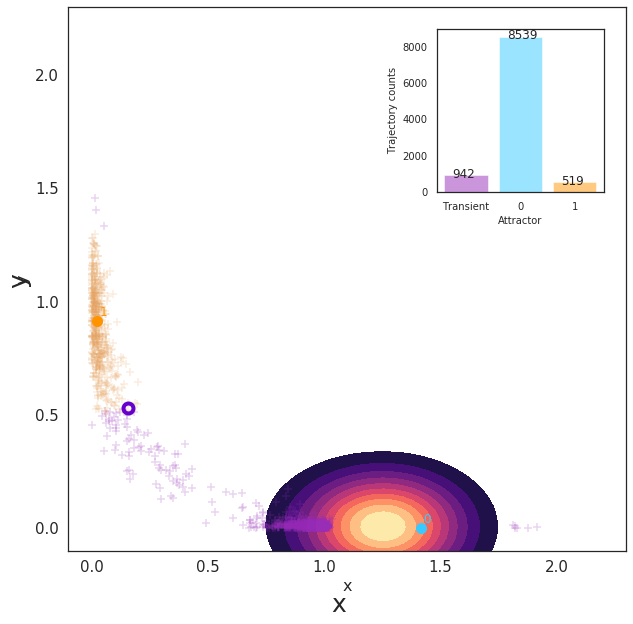

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
fig.text(0.5, 0.04, 'x', ha ='center', fontsize = 25)
fig.text(0.04, 0.5, 'y', va='center', rotation='vertical', fontsize = 25)

ax.set_xlim([-0.1,2.3])
ax.set_ylim([-0.1,2.3])
ax.set_xticks(np.arange(0, 2.5, 0.5))
ax.set_yticks(np.arange(0, 2.5, 0.5))
ax.tick_params(axis='both', which='major', labelsize=15)
x_ss_stable = grouped_stable_ss[0][:,0][:,2]
y_ss_stable = grouped_stable_ss[0][:,1][:,2]

for ss_index in range(len(x_ss_stable)):
    ax.plot(x_ss_stable[ss_index], y_ss_stable[ss_index], '.', color = ss_colors[ss_index], markersize= 20 )
    ax.annotate('{}'.format(ss_index), xy=(x_ss_stable[ss_index], y_ss_stable[ss_index]),  xycoords='data',
        xytext=(x_ss_stable[ss_index] + 0.01, y_ss_stable[ss_index] + 0.02), color = ss_colors[ss_index])

x_ss_unstable = grouped_unstable_ss[0][:,0][:,2]
y_ss_unstable = grouped_unstable_ss[0][:,1][:,2]
for ss_index in range(len(x_ss_unstable)):
    ax.plot(x_ss_unstable[ss_index], y_ss_unstable[ss_index], '.', color = "#6600cc", mfc='none',markeredgewidth = 4, markersize= 20 )
    
#ax2.set_title("Alpha = {},{}".format(grouped_stable_ss[:,0][0][0], grouped_stable_ss[:,0][0][1]))

ins = ax.inset_axes([0.66,0.66,0.3,0.3])
attractor_count_dict = OrderedDict(sorted(Counter(final_attractors).items(), key=lambda t: t[0]))
barplot_col = ['#992DBA', '#38CAFF', '#ff9400', '#99dd44']
ins.bar(attractor_count_dict.keys(), attractor_count_dict.values(), align='center', alpha=0.5, color = barplot_col)
ins.set_ylabel('Trajectory counts')
ins.set_xlabel('Attractor')
ins.set_xticks(np.arange(-1, len(x_ss_stable),1))#ax.plot.xticks([-1,0,1,2])
labels = ins.get_xticks().tolist()
labels[0] = "Transient"
ins.set_xticklabels(labels)

for item in ([ins.xaxis.label, ins.yaxis.label] +
             ins.get_xticklabels() + ins.get_yticklabels()):
    item.set_fontsize(10)
    
for index, count in enumerate(attractor_count_dict.values()):
    ins.text(x=index-1.25 , y =count-150 , s=f"{count}" , fontdict=dict(fontsize=12))
    
sns.kdeplot(traj_hm.x, traj_hm.y, cmap=plt.cm.magma, shade=True, bw=.15, gridsize=100, ax = ax, shade_lowest = False)
ax.scatter(transient_traj_hm.x, transient_traj_hm.y, color = '#992DBA', s = 60, marker = '+', alpha = 0.2)
ax.scatter(alt_traj_hm.x, alt_traj_hm.y, color = '#E6A260', s = 60, marker = '+', alpha = 0.2)

#fig.savefig('images/03_test_density_switch_rebel_regime2.png', bbox_inches='tight')

#b = ax2.scatter(em_change_traj[path_id][0][time_start:time_max], em_change_traj[path_id][1][time_start:time_max], c = range(n), norm=MidpointNormalize(midpoint=diverging_time,vmin=time_start, vmax=time_max), cmap=plt.cm.PiYG, linewidths=0, marker='o', s=3)
#ax2.set_title("Phase portrait of X and Y with simulated trajectory")
#plt.colorbar(b)

# Regime 03 (Autonomous)

## Labelling and counting final attractors at t = n

In [29]:
final_attractors = final_attractor(em_change_traj_final, dist_exit_x, dist_exit_y, stable_steady_states)

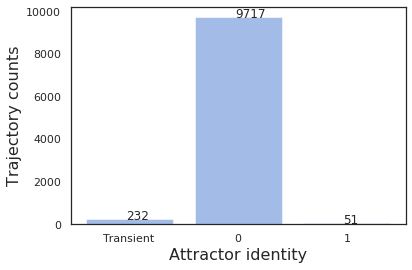

In [30]:
attractor_count_dict = OrderedDict(sorted(Counter(final_attractors).items(), key=lambda t: t[0]))
fig, ax = plt.subplots()

ax.bar(attractor_count_dict.keys(), attractor_count_dict.values(), align='center', alpha=0.5)
plt.ylabel('Trajectory counts')
plt.xlabel('Attractor identity')
ax.xaxis.set_ticks(np.arange(-1, 2, 1))#ax.plot.xticks([-1,0,1,2])
a = ax.get_xticks().tolist()
a[0] = "Transient"
ax.set_xticklabels(a)

for index, count in enumerate(attractor_count_dict.values()):
    plt.text(x=index-1.03 , y =count+1 , s=f"{count}" , fontdict=dict(fontsize=12))

## Classifying trajectories as transient or in alternative attractor

In [31]:
last = em_change_traj_final[:,:,-1:]
x_vals = last[:,0,:].flatten()
y_vals = last[:,1,:].flatten()
traj_hm = pd.DataFrame({"x" : x_vals, "y" : y_vals})

In [32]:
transient_index = [i for i, j in enumerate(final_attractors) if j == -1]
transient_traj = em_change_traj_final[transient_index]

transient_last = transient_traj[:,:,-1]
transient_x_vals = transient_last[:,0].flatten()
transient_y_vals = transient_last[:,1].flatten()
transient_traj_hm = pd.DataFrame({"x" : transient_x_vals, "y" : transient_y_vals})

alt_index = [i for i, j in enumerate(final_attractors) if j == 1]
alt_traj = em_change_traj_final[alt_index]

alt_last = alt_traj[:,:,-1]
alt_x_vals = alt_last[:,0].flatten()
alt_y_vals = alt_last[:,1].flatten()
alt_traj_hm = pd.DataFrame({"x" : alt_x_vals, "y" : alt_y_vals})


## First passage time

In [64]:
em_diverging = em_change_traj[:,:,int(diverging_time*2):]
dist_entry_x = dist_entry_y = dist_x = dist_y = 0.1
dist_exit_x = dist_exit_y = 0.4
fpt_3 = first_passage_time(em_diverging, T, n, dist_entry_x, dist_entry_y, stable_steady_states)
#np.save(file = "em_traj_change_fpt", arr = fpt)
#fpt = np.load("files/npy/em_traj_change_fpt.npy")

In [68]:
fpt_3.shape

(10000, 3)

## Plot - Density plot with proportion inset

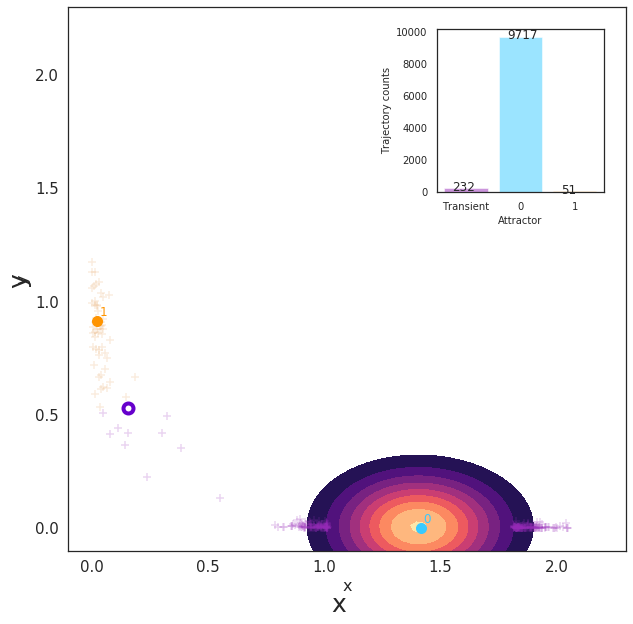

In [34]:
"""
fig, axes = plt.subplots(1, 3, figsize=(16,6))
ax0, ax1, ax2 = axes.flatten()
time_start= 0
time_max = 100000
path_id = 67


ax0.plot(t[time_start:time_max],em_change_traj[path_id][0][time_start:time_max])
ax0.set_title("Sample path of gene X")
ax1.plot(t[time_start:time_max],em_change_traj[path_id][1][time_start:time_max])
ax1.set_title("Sample path of gene Y")
"""
fig, ax = plt.subplots(1, 1, figsize=(10,10))
fig.text(0.5, 0.04, 'x', ha ='center', fontsize = 25)
fig.text(0.04, 0.5, 'y', va='center', rotation='vertical', fontsize = 25)
ax.tick_params(axis='both', which='major', labelsize=15)

ax.set_xlim([-0.1,2.3])
ax.set_ylim([-0.1,2.3])
ax.set_xticks(np.arange(0, 2.5, 0.5))
ax.set_yticks(np.arange(0, 2.5, 0.5))

x_ss_stable = grouped_stable_ss[0][:,0][:,2]
y_ss_stable = grouped_stable_ss[0][:,1][:,2]

for ss_index in range(len(x_ss_stable)):
    ax.plot(x_ss_stable[ss_index], y_ss_stable[ss_index], '.', color = ss_colors[ss_index], markersize= 20 )
    ax.annotate('{}'.format(ss_index), xy=(x_ss_stable[ss_index], y_ss_stable[ss_index]),  xycoords='data',
        xytext=(x_ss_stable[ss_index] + 0.01, y_ss_stable[ss_index] + 0.02), color = ss_colors[ss_index])

x_ss_unstable = grouped_unstable_ss[0][:,0][:,2]
y_ss_unstable = grouped_unstable_ss[0][:,1][:,2]
for ss_index in range(len(x_ss_unstable)):
    ax.plot(x_ss_unstable[ss_index], y_ss_unstable[ss_index], '.', color = "#6600cc", mfc='none',markeredgewidth = 4, markersize= 20 )
    
#ax2.set_title("Alpha = {},{}".format(grouped_stable_ss[:,0][0][0], grouped_stable_ss[:,0][0][1]))

ins = ax.inset_axes([0.66,0.66,0.3,0.3])
attractor_count_dict = OrderedDict(sorted(Counter(final_attractors).items(), key=lambda t: t[0]))
barplot_col = ['#992DBA', '#38CAFF', '#ff9400', '#99dd44']
ins.bar(attractor_count_dict.keys(), attractor_count_dict.values(), align='center', alpha=0.5, color = barplot_col)
ins.set_ylabel('Trajectory counts')
ins.set_xlabel('Attractor')
ins.set_xticks(np.arange(-1, len(x_ss_stable),1))#ax.plot.xticks([-1,0,1,2])
labels = ins.get_xticks().tolist()
labels[0] = "Transient"
ins.set_xticklabels(labels)

for item in ([ins.xaxis.label, ins.yaxis.label] +
             ins.get_xticklabels() + ins.get_yticklabels()):
    item.set_fontsize(10)
    
for index, count in enumerate(attractor_count_dict.values()):
    ins.text(x=index-1.25 , y =count-150 , s=f"{count}" , fontdict=dict(fontsize=12))
    
sns.kdeplot(traj_hm.x, traj_hm.y, cmap=plt.cm.magma, shade=True, bw=.15, gridsize=100, ax = ax, shade_lowest = False)
ax.scatter(transient_traj_hm.x, transient_traj_hm.y, color = '#992DBA', s = 60, marker = '+', alpha = 0.2)
ax.scatter(alt_traj_hm.x, alt_traj_hm.y, color = '#E6A260', s = 60, marker = '+', alpha = 0.2)

fig.savefig('images/03_density_switch_rebel_regime3.png', bbox_inches='tight')

#b = ax2.scatter(em_change_traj[path_id][0][time_start:time_max], em_change_traj[path_id][1][time_start:time_max], c = range(n), norm=MidpointNormalize(midpoint=diverging_time,vmin=time_start, vmax=time_max), cmap=plt.cm.PiYG, linewidths=0, marker='o', s=3)
#ax2.set_title("Phase portrait of X and Y with simulated trajectory")
#plt.colorbar(b)

# First passage time distribution

In [ ]:
em_diverging = em_change_traj[:,:,int(diverging_time):]
dist_entry_x = dist_entry_y = dist_x = dist_y = 0.1
dist_exit_x = dist_exit_y = 0.4
fpt = first_passage_time(em_diverging, T, n, dist_entry_x, dist_entry_y, stable_steady_states)
#np.save(file = "em_traj_change_fpt", arr = fpt)
#fpt = np.load("files/npy/em_traj_change_fpt.npy")

In [53]:
fpt.shape

(10000, 2)

In [15]:
fpt_attractor = [fpt[:,0], fpt[:,1]]
labels = ["Primary attractor", "Secondary attractor" ]

## Plot - FPT 

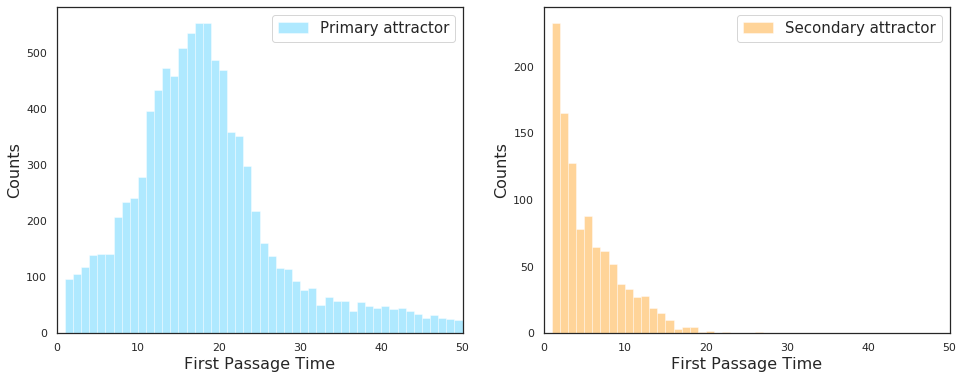

In [16]:
t = np.arange(1,60,1)
#plt.hist(fpt_attractor0, t, color='g', label='Ideal')
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
#from scipy import stats
fig, ax = plt.subplots(1, 2, figsize=(16,6))

for i in range(2):
    sns.distplot(fpt_attractor[i], t, color=ss_colors[i], label = labels[i], kde = False, ax = ax[i]) #fit=stats.norm)
    ax[i].set_xlim([0,50])
    ax[i].legend(loc="upper right", prop={'size': 15})
    ax[i].set_xlabel('First Passage Time')
    ax[i].set_ylabel('Counts')
            
#fig.savefig('plots_stochastic/03_FPT_histograms.png', bbox_inches='tight')

# Attractor transition matrices as graph using networkx and pygraphviz


##  Attractor transition matrices (Regime 1 - tristable) 

In [18]:
transition_mat = np.load("files/npy/em_traj_transition_mat.npy") #Output of switch_stats function

In [20]:
e = np.sum(transition_mat, axis = 0)
normalised_transition_mat = np.round((e.T/e.sum(axis=1)).T , 2)
#ss_colors_new = ["#ED1C24", '#38b6ff', '#ff9400'] #Specifying the attractor colors

G = nx.DiGraph(normalised_transition_mat)
for u,v,d in G.edges(data=True):
    d['label'] = d.get('weight','')
        
A = to_agraph(G)
A.layout(prog='dot')

for i, node in enumerate(A.iternodes()):
    node.attr['fillcolor'] = ss_colors[i]
    node.attr['style'] = "filled"
    
#A.draw('plots_stochastic/Transition_matrices_0.3_0.3.png')

## (Plot) Attractor transition matrices (Regime 2) as graph using networkx and pygraphviz

In [ ]:
transition_mat = np.load("npy_objects/em_traj_transition_mat_after.npy")

In [ ]:
e = np.sum(transition_mat, axis = 0)
normalised_transition_mat = np.round((e.T/e.sum(axis=1)).T , 2)
#ss_colors_new = ["#ED1C24", '#38b6ff', '#ff9400'] #Specifying the attractor colors

G = nx.DiGraph(normalised_transition_mat)
for u,v,d in G.edges(data=True):
    d['label'] = d.get('weight','')
        
A = to_agraph(G)
A.layout(prog='dot')

for i, node in enumerate(A.iternodes()):
    node.attr['fillcolor'] = ss_colors[i]
    node.attr['style'] = "filled"
    
#A.draw('plots_stochastic/03_Transition_matrices_0.8_0.3_10000traj.png')

## (Plot) Attractor transition matrices (Regime 3) as graph using networkx and pygraphviz

In [ ]:
transition_mat = np.load("npy_objects/em_traj_transition_mat_after.npy")

In [ ]:
e = np.sum(transition_mat, axis = 0)
normalised_transition_mat = np.round((e.T/e.sum(axis=1)).T , 2)
#ss_colors_new = ["#ED1C24", '#38b6ff', '#ff9400'] #Specifying the attractor colors

G = nx.DiGraph(normalised_transition_mat)
for u,v,d in G.edges(data=True):
    d['label'] = d.get('weight','')
        
A = to_agraph(G)
A.layout(prog='dot')

for i, node in enumerate(A.iternodes()):
    node.attr['fillcolor'] = ss_colors[i]
    node.attr['style'] = "filled"
    
#A.draw('plots_stochastic/03_Transition_matrices_0.8_0.3_10000traj_regime3.png')

## (Plot) Dwell time (Regime 1- tristable) in attractors

In [21]:
switching = np.load("files/npy/em_traj_change_switching.npy",allow_pickle = True )

In [39]:
all_dwell, mean_dwell = dwell_times(switching, T/3, dt)


In [40]:
attractor_dwell_0 = [val/(int(n/3))*100 for xi in all_dwell for val in xi[0]]
attractor_dwell_1 = [val/(int(n/3))*100 for xi in all_dwell for val in xi[1]]
attractor_dwell_2 = [val/(int(n/3))*100 for xi in all_dwell for val in xi[2]]
attractor_dwell = [attractor_dwell_0, attractor_dwell_1, attractor_dwell_2]
labels = ["Attractor 0", "Attractor 1", "Attractor 2" ]

IndexError: list index out of range

Text(0, 0.5, 'Counts')

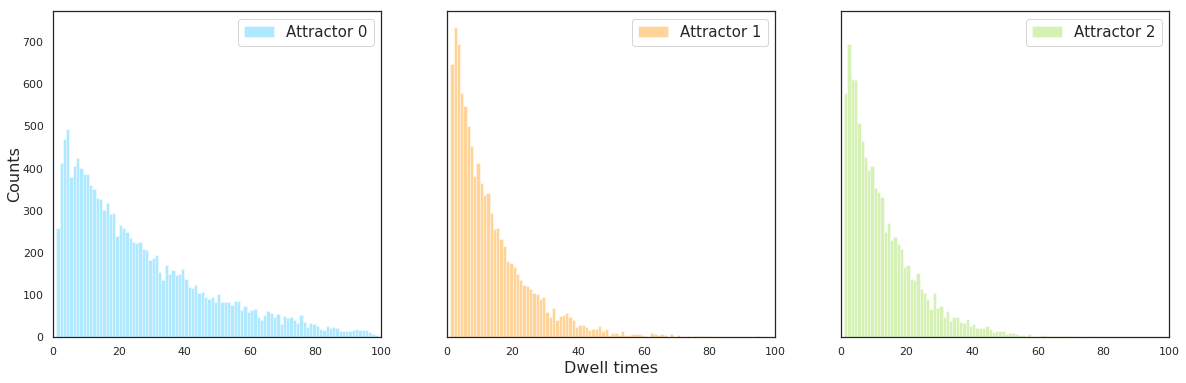

In [41]:
t = np.arange(1,100,1)
#plt.hist(fpt_attractor0, t, color='g', label='Ideal')
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
#from scipy import stats
fig, ax = plt.subplots(1, 3, figsize=(20,6), sharex=True, sharey=True)
fig.add_subplot(111, frameon=False) # Create big axes and hide frame

for i in range(3):
    sns.distplot(attractor_dwell[i], t, color=ss_colors[i], label = labels[i], kde = False, ax = ax[i]) #fit=stats.norm)
    ax[i].set_xlim([0,100])
    ax[i].legend(loc="upper right", prop={'size': 15})

plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False) # Remove ticks and labels for big axes    
plt.grid(False)
plt.xlabel('Dwell times')
plt.ylabel('Counts') 
#ax[i].set_xlabel('Dwell times')
#ax[i].set_ylabel('Counts')
#plt.savefig('plots_stochastic/03_alldwelltimes%_before.png', bbox_inches='tight')          

In [45]:
mean_dwell_times = np.array(mean_dwell).mean(axis = 0)/(int(n/2))*100
sd_dwell_times = np.array(mean_dwell).std(axis = 0)
print("Standard deviation across trajectories", sd_dwell_times)
print("Mean across trajectories", mean_dwell_times)
attractor_names = ["0", "1", "2"]

Standard deviation across trajectories [5799.65003114 3899.36801355]
Mean across trajectories [6.66956725 2.07573751]


In [46]:
mean_dwell_times/(int(n/2))

array([8.89275633e-05, 2.76765001e-05])

ValueError: shape mismatch: objects cannot be broadcast to a single shape

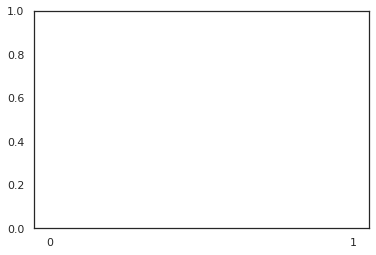

In [47]:
plt.bar(attractor_names, mean_dwell_times, align='center', alpha=0.5, color = ss_colors)
plt.ylabel('Mean residence time (%)')
plt.xlabel('Attractors')

#plt.savefig('plots_stochastic/03_meandwelltime%_before.png', bbox_inches='tight')

## (Plot) Dwell time (Regime 2) in attractors

In [37]:
switching = np.load("files/npy/em_traj_change_switching_after.npy",allow_pickle = True )

In [48]:
all_dwell, mean_dwell = dwell_times(switching, 2*T/3, dt)

In [49]:
attractor_dwell_0 = [val/(int(2*T/3))*100 for xi in all_dwell for val in xi[0]]
attractor_dwell_1 = [val/(int(2*T/3))*100 for xi in all_dwell for val in xi[1]]
attractor_dwell = [attractor_dwell_0, attractor_dwell_1]
labels = ["Attractor 0", "Attractor 1"]

Text(0, 0.5, 'Counts')

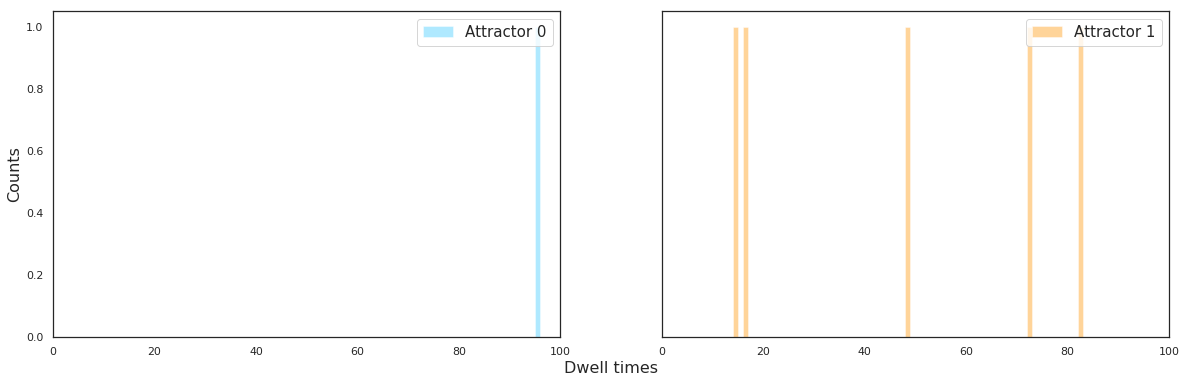

In [51]:
t = np.arange(1,100,1)
#plt.hist(fpt_attractor0, t, color='g', label='Ideal')
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
#from scipy import stats
fig, ax = plt.subplots(1,2, figsize=(20,6), sharex=True, sharey=True)
fig.add_subplot(111, frameon=False) # Create big axes and hide frame

for i in range(2):
    sns.distplot(attractor_dwell[i], t, color=ss_colors[i], label = labels[i], kde = False, ax = ax[i]) #fit=stats.norm)
    ax[i].set_xlim([0,100])
    ax[i].legend(loc="upper right", prop={'size': 15})

plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False) # Remove ticks and labels for big axes    
plt.grid(False)
plt.xlabel('Dwell times')
plt.ylabel('Counts') 
#ax[i].set_xlabel('Dwell times')
#ax[i].set_ylabel('Counts')
#plt.savefig('plots_stochastic/03_alldwelltimes%_after.png', bbox_inches='tight')          

In [ ]:
mean_dwell_times = np.array(mean_dwell).mean(axis = 0)/(int(n/2))*100
sd_dwell_times = np.array(mean_dwell).std(axis = 0)
print("Standard deviation across trajectories", sd_dwell_times)
print("Mean across trajectories", mean_dwell_times)
attractor_names = ["0", "1"]

In [ ]:
sd_dwell_times

In [ ]:
mean_dwell_times/(int(n/2))

In [ ]:
plt.bar(attractor_names, mean_dwell_times, align='center', alpha=0.5, color = ss_colors)
plt.ylabel('Mean residence time (%)')
plt.xlabel('Attractors')

plt.savefig('plots_stochastic/03_meandwelltime%_after.png', bbox_inches='tight')

## (Plot) Dwell time (Regime 3) in attractors

In [ ]:
switching = np.load("npy_objects/em_traj_change_switching_regime3.npy",allow_pickle = True )

In [ ]:
all_dwell, mean_dwell = dwell_times(switching, T/2, dt)

In [ ]:
attractor_dwell_0 = [val/(int(n/3))*100 for xi in all_dwell for val in xi[0]]
attractor_dwell_1 = [val/(int(n/3))*100 for xi in all_dwell for val in xi[1]]
attractor_dwell = [attractor_dwell_0, attractor_dwell_1]
labels = ["Attractor 0", "Attractor 1"]

In [ ]:
t = np.arange(1,100,1)
#plt.hist(fpt_attractor0, t, color='g', label='Ideal')
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
#from scipy import stats
fig, ax = plt.subplots(1,2, figsize=(20,6), sharex=True, sharey=True)
fig.add_subplot(111, frameon=False) # Create big axes and hide frame

for i in range(2):
    sns.distplot(attractor_dwell[i], t, color=ss_colors[i], label = labels[i], kde = False, ax = ax[i]) #fit=stats.norm)
    ax[i].set_xlim([0,100])
    ax[i].legend(loc="upper right", prop={'size': 15})

plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False) # Remove ticks and labels for big axes    
plt.grid(False)
plt.xlabel('Dwell times')
plt.ylabel('Counts') 
#ax[i].set_xlabel('Dwell times')
#ax[i].set_ylabel('Counts')
plt.savefig('plots_stochastic/03_alldwelltimes%_after_regime3.png', bbox_inches='tight')          

In [ ]:
mean_dwell_times = np.array(mean_dwell).mean(axis = 0)/(int(n/2))*100
sd_dwell_times = np.array(mean_dwell).std(axis = 0)
print("Standard deviation across trajectories", sd_dwell_times)
print("Mean across trajectories", mean_dwell_times)
attractor_names = ["0", "1"]

In [ ]:
plt.bar(attractor_names, mean_dwell_times, align='center', alpha=0.5, color = ss_colors)
plt.ylabel('Mean residence time (%)')
plt.xlabel('Attractors')

#plt.savefig('plots_stochastic/03_meandwelltime%_after_regime3.png', bbox_inches='tight')

In [ ]:
em_traj_regimes3 = np.load("em_traj_change_3regimes.npy",allow_pickle = True )

In [ ]:
em_traj_regimes3.shape